In [1]:
#!/usr/bin/env python
# coding: utf-8

import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf

Nside=512
Nside_red=16
tau=[(0.01,0.01),(0.06,0.06),(0.07,0.07),(0.08,0.08)]
r=(0.0,0.0)
n_test=1
n_channels=2
pol=1 #2
res=hp.nside2resol(Nside_red) 
sensitivity=4 #muK-arcmin

for i in range(len(tau)):
    seed_test=70+i
    np.random.seed(seed_test)# i set a seed for the generation of the maps and the a_lm. I use a seed for reproducibility.
    outfile_name="test_data_r00"+str(int(r[0]*100))+"_t00"+str(int(tau[i][0]*100))+"_"+str(seed_test)
    
    data=uf.generate_cl(n_spectra=1,Nside=Nside,Nside_red=Nside_red,tau_interval=tau[i],r_interval=r,raw=1,verbose=0)
    
    input_folder="/home/amorelli/foreground_noise_maps/noise_generation"
    input_files=os.listdir(input_folder)
    for j in range(len(input_files)):
        input_files[j]=input_folder+"/"+input_files[j]
    noise_maps=uf.generate_noise_maps(n_train=n_test,n_channels=n_channels,nside=Nside_red,pol=2,
                                              sensitivity=sensitivity,input_files=input_files)
    
    
    noise_E,noise_B=uf.convert_to_EB(noise_maps)
    
    maps_per_cl_gen=uf.maps_per_cl(distribution=0)
    maps_per_cl=maps_per_cl_gen.compute_maps_per_cl([tau[i][0]],n_train=n_test,n_train_fix=n_test)
    
    mappe,y_tau=uf.generate_maps(data, r=[tau[i][0]],n_train=n_test,nside=Nside_red, beam_w=2*res, noise_maps=noise_E,
                                    map_per_cl=maps_per_cl, kind_of_map="EE", raw=1 , n_channels=n_channels,beam_yes=1 , verbose=0)
    
    #np.savez(outfile_name,x_test=mappe,y_test=y_tau) 

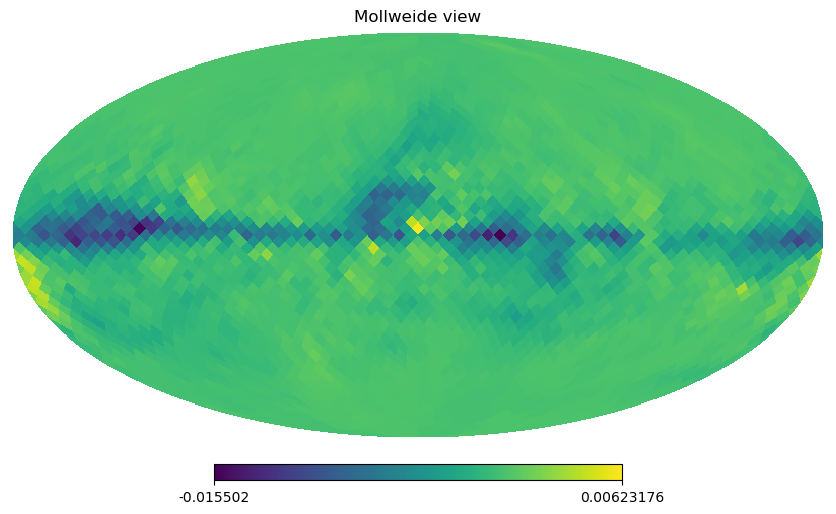

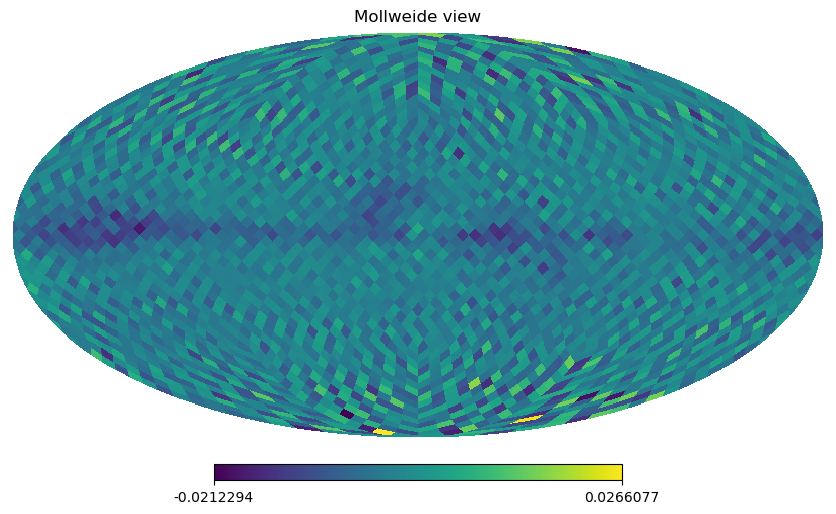

In [20]:
hp.mollview(noise_maps[0,:,0]-noise_maps[0,:,1])
alm_E=hp.map2alm(noise_E[0,:,0], pol=False, verbose=True)
alm_B=hp.map2alm(noise_B[0,:,0], pol=False, verbose=True)
alm_T=hp.map2alm(noise_E[0,:,1], pol=False, verbose=True)
noise=hp.alm2map([alm_T,alm_E,alm_B], nside=16, pol=True)
hp.mollview(noise[1]-noise[2])